In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
np.set_printoptions(precision=4, suppress= True)
import datetime as dt
from datetime import date,timedelta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import datetime 
import math

### Data of Nifty returns 2012 - 2022

In [6]:
df = np.loadtxt("^NSEI.csv",delimiter=',', usecols= 1)

In [7]:
df

array([-0.0062,  0.0048, -0.0037, ..., -0.0044,  0.0026, -0.0061])

In [8]:
df.size

2435

In [9]:
df.mean()

0.000522305338809035

In [10]:
df.std()

0.010839738139196982

## Consider Nifty distribution follow N.D lets create PDF from 10 to -10 with 1000 values

In [11]:
x = np.linspace(-0.1,0.1, 1000)

In [12]:
y = stats.norm.pdf(x, loc = df.mean(), scale = df.std())

In [ ]:
plt.figure(figsize = (20, 8))
plt.hist(df, density = True, bins = 200, label = "Nifty daily returns 2012-2022"
plt.plot(x, y, label = "Normal Distribution")
plt.title("Normality of Nifty return", fontsize = 20)
plt.xlabel("daily returns", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

we have negative skew

In [14]:
stats.skew(df)

-0.9521376505001812

### Apply hypothesis test & check null hypothesis

In [15]:
stats.skewtest(df)

SkewtestResult(statistic=-16.419428671815655, pvalue=1.3886811936779407e-60)

In [16]:
stats.kurtosis(df)

15.252477522243744

### As your plave is very small, therefore your daily returns show fat tails & returns are not N.D

In [17]:
stats.kurtosistest(df)

KurtosistestResult(statistic=23.252235122704946, pvalue=1.3503627461077493e-119)

In [18]:
stats.normaltest(df)

NormaltestResult(statistic=810.2640761103955, pvalue=1.1308146608231544e-176)

# Using Parametric Method

The investment fund ABC is currently have 1,00,000₹ position in Nifty. The Risk Manager of the fund wants to estimate the tail risk of this position based on historical data.

Calculate the minimum loss over a one-day period that will occur with 1% probability: 1% VaR of 1,00,000₹ over a one-day period using parametric method.

1% VaR of 1,00,000₹ over a one-day period

In [19]:
I0 = 100000
prob = 0.01

mean return

In [20]:
mean = df.mean()
mean

0.000522305338809035

Standard Deviation

In [21]:
std = df.std()
std

0.010839738139196982

The prob. of 1% that daily return get less then -2.4%

In [22]:
stats.norm.ppf(loc = mean, scale= std, q = prob)

-0.024694696436471285

There is 1% prob. that ABC will exceed experience a loss of 2469.46 ₹ or more at any given day.

In [23]:
var_p = stats.norm.ppf(loc = mean, scale = std, q = prob) * I0
var_p

-2469.4696436471286

## Using daily mean return = 0%

In [24]:
stats.norm.ppf(loc = 0, scale= std, q=prob)* I0

-2521.700177528032

## Using a mean forecast that Nifty will have -5% return on annual base

In [25]:
annual = -0.05

In [26]:
daily = (1 + annual)**(1/252)-1
daily

-0.0002035241051570047

Daily return

In [27]:
stats.norm.ppf(loc = daily, scale= std, q=prob)* I0

-2542.052588043732

# Hisoritical Method

### 1% VaR of 1,00,000₹ over a one-day period

In [28]:
np.percentile(df, prob * 100)

-0.028160884

If you can see the first percentile of dataset is -2.81%. So in time period 2012 to 2022 1% of our daily return are even lower than -2.81%. It's even more than VAR we caculated in Parametic method. It is because we have fat tails in daily returns so we have extermly negative or positive returns & parametic method that actually not take it to account this very negative outcomes, but  historicalmethod does.

In [29]:
var_h = np.percentile(df, prob * 100) * I0
var_h

-2816.0884

# 

## Monte Carlo Simulation - Parametric Method (Part 1)

The investment fund ABC is currently have 1,00,000₹ position in Nifty. The Risk Manager of the fund wants to estimate the tail risk (extreme negative outcomes) pf this podition based on historical data.

Simulate the minimum loss over a periodof one quarter that will occur with 1% probility: 1% VAR of 1,00,000₹ over a period of one quarter (63 business days). Use the parametric method.

### Calculating for the quarters assuming investment of 100

In [30]:
I0 = 100
size = int(252 / 4)

In [31]:
size

63

### One Simulating / path

We are using parametric method which assumes normality of returns that which we can simulate daily returns.

In [32]:
np.random.seed(123)
ret = np.random.normal(loc = mean, scale = std, size= size)
ret

array([-0.0112,  0.0113,  0.0036, -0.0158, -0.0057,  0.0184, -0.0258,
       -0.0041,  0.0142, -0.0089, -0.0068, -0.0005,  0.0167, -0.0064,
       -0.0043, -0.0042,  0.0244,  0.0242,  0.0114,  0.0047,  0.0085,
        0.0167, -0.0096,  0.0133, -0.0131, -0.0064,  0.0104, -0.015 ,
       -0.001 , -0.0088, -0.0022, -0.0298, -0.0187, -0.0071,  0.0106,
       -0.0014,  0.0006,  0.008 , -0.009 ,  0.0036, -0.0082, -0.0182,
       -0.0037,  0.0067,  0.0042,  0.0004,  0.0265,  0.005 ,  0.0111,
        0.0248, -0.0135, -0.0107,  0.0194, -0.0081,  0.0008,  0.0121,
        0.0102,  0.0195,  0.0167,  0.0121, -0.0079,  0.0091,  0.0039])

We add every return 1 & now we calculate cumulative product for each and every time step we calculate investment multiple & then multiply with initial investment.

In [33]:
path = (ret+ 1).cumprod() * I0
path

array([ 98.8754,  99.996 , 100.355 ,  98.7688,  98.2009, 100.0101,
        97.4316,  97.0295,  98.4117,  97.5385,  96.8717,  96.8228,
        98.4386,  97.8083,  97.3887,  96.981 ,  99.3507, 101.7576,
       102.9182, 103.4028, 104.2833, 106.0229, 105.0028, 106.3959,
       105.0054, 104.3343, 105.4147, 103.8373, 103.7339, 102.819 ,
       102.5879,  99.5293,  97.6701,  96.9801,  98.0057,  97.8725,
        97.9266,  98.7083,  97.8188,  98.1706,  97.3649,  95.5923,
        95.2372,  95.8793,  96.2813,  96.3192,  98.8673,  99.3615,
       100.4675, 102.9574, 101.567 , 100.4764, 102.428 , 101.5954,
       101.6812, 102.9129, 103.9602, 105.9921, 107.7659, 109.0714,
       108.2148, 109.2037, 109.6327])

Now we add 100 as our initial value at start.

In [34]:
path = np.insert(path, 0, I0)

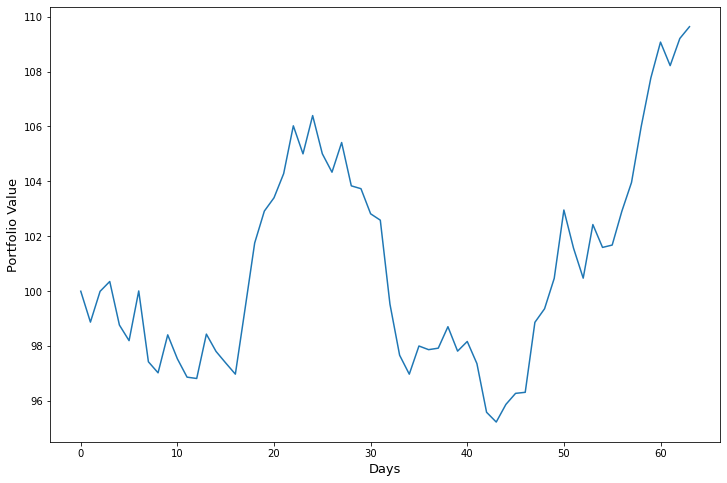

In [35]:
plt.figure(figsize=(12,8))
plt.plot(path)
plt.xlabel("Days", fontsize= 13)
plt.ylabel("Portfolio Value", fontsize = 13)
plt.show()

## Monte Carlo Simulation - Parametric Method (Part 2)

Now we use multiple simulation.

In [36]:
sims = 10000
days= 63

We have to create total 630000 random reutrns by reshape method by 10000 rows & 63 columns.

In [37]:
np.random.seed(123)
ret = np.random.normal(loc = mean, scale = std, size= days * sims).reshape(sims, days)

In [38]:
ret.shape

(10000, 63)

In [39]:
paths = (ret + 1).cumprod(axis = 1) * I0
paths

array([[ 98.8754,  99.996 , 100.355 , ..., 108.2148, 109.2037, 109.6327],
       [ 98.6146, 100.1811, 101.1101, ...,  98.496 , 100.265 , 100.0237],
       [100.9328, 101.5323, 102.1074, ..., 105.3603, 104.2983, 103.9516],
       ...,
       [ 98.8304,  96.6927,  95.8304, ...,  95.5924,  95.3258,  95.9332],
       [ 98.2969,  97.0963,  97.9992, ..., 110.0862, 109.2561, 108.9711],
       [100.5135, 101.4646, 100.2289, ..., 116.0365, 118.4152, 119.391 ]])

In [40]:
paths = np.hstack((np.ones(sims).reshape(sims, 1)*100, paths))
paths

array([[100.    ,  98.8754,  99.996 , ..., 108.2148, 109.2037, 109.6327],
       [100.    ,  98.6146, 100.1811, ...,  98.496 , 100.265 , 100.0237],
       [100.    , 100.9328, 101.5323, ..., 105.3603, 104.2983, 103.9516],
       ...,
       [100.    ,  98.8304,  96.6927, ...,  95.5924,  95.3258,  95.9332],
       [100.    ,  98.2969,  97.0963, ..., 110.0862, 109.2561, 108.9711],
       [100.    , 100.5135, 101.4646, ..., 116.0365, 118.4152, 119.391 ]])

In [41]:
def path_simul_param(df, days, I0, sims= 10000, seed= 123):
    
    mean = np.mean(df)
    std = np.std(df)
    days = int(days)
    
    np.random.seed(seed)
    ret = np.random.normal(loc = mean, scale = std, size = days * sims).reshape(sims, days)
    
    paths = ( ret + 1).cumprod(axis = 1) * I0
    paths = np.hstack((np.ones(sims).reshape(sims, 1)* I0, paths))
    return paths

Now we call the function by passing our Nifty returns to daily returns.

In [42]:
paths = path_simul_param(df = df, days = 63, I0 = 100)

In [43]:
paths

array([[100.    ,  98.8754,  99.996 , ..., 108.2148, 109.2037, 109.6327],
       [100.    ,  98.6146, 100.1811, ...,  98.496 , 100.265 , 100.0237],
       [100.    , 100.9328, 101.5323, ..., 105.3603, 104.2983, 103.9516],
       ...,
       [100.    ,  98.8304,  96.6927, ...,  95.5924,  95.3258,  95.9332],
       [100.    ,  98.2969,  97.0963, ..., 110.0862, 109.2561, 108.9711],
       [100.    , 100.5135, 101.4646, ..., 116.0365, 118.4152, 119.391 ]])

In [44]:
paths.shape

(10000, 64)

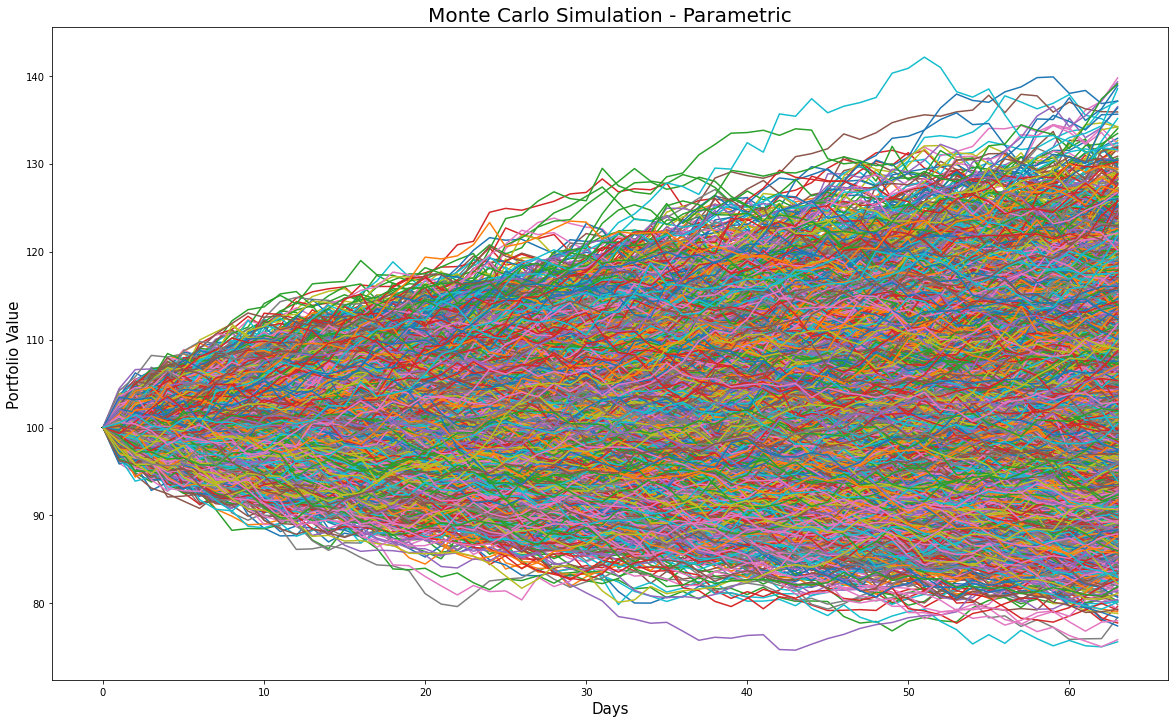

In [45]:
plt.figure(figsize=(20,12))
plt.plot(paths.T)
plt.xlabel("Days", fontsize= 15)
plt.ylabel("Portfolio Value", fontsize = 15)
plt.title("Monte Carlo Simulation - Parametric", fontsize = 20)
plt.show()

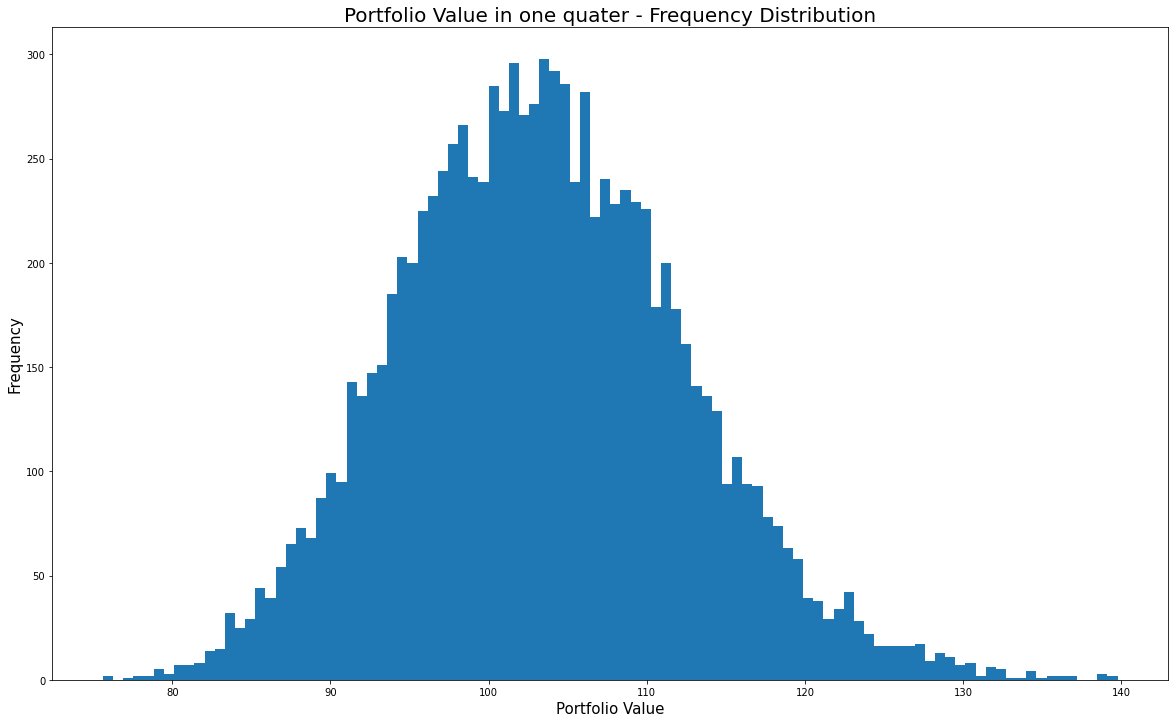

In [46]:
plt.figure(figsize=(20,12))
plt.hist(paths[:,-1], bins = 100)
plt.ylabel("Frequency", fontsize= 15)
plt.xlabel("Portfolio Value", fontsize = 15)
plt.title("Portfolio Value in one quater - Frequency Distribution", fontsize = 20)
plt.show()

Now we increase our simulation to 1 million 

In [47]:
sims = 1000000
I0 = 100000

In [48]:
paths = path_simul_param(df, days = 63, I0 = I0, sims = sims)

Now we will see we have 1M rows & 64 columns 

In [49]:
paths.shape

(1000000, 64)

We are only interested in final value of our column of calculating VAR.

In [50]:
final_p = paths[:, -1]

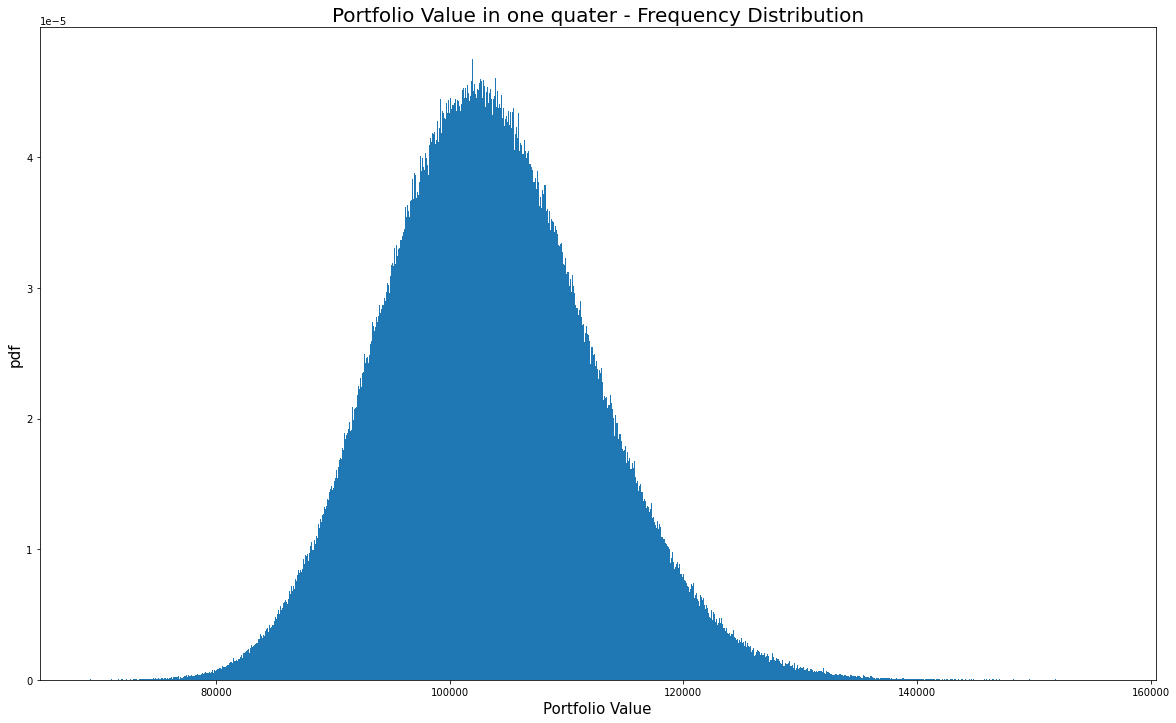

In [51]:
plt.figure(figsize=(20,12))
plt.hist(final_p, bins = 1000, density = True)
plt.ylabel("pdf", fontsize= 15)
plt.xlabel("Portfolio Value", fontsize = 15)
plt.title("Portfolio Value in one quater - Frequency Distribution", fontsize = 20)
plt.show()

The plot pretty much looks like bell shaped curve & typicall stock price follows lognormal distribution which is right skewed.Because on left hand side the extreme values and outcomes are actually limited to zero, So we can not get value bellow zero there is no limitation on right hand side. 

In [52]:
final_p.mean()

103359.58187253581

In [53]:
np.median(final_p)

102978.38796645109

In [54]:
final_p.std()

8911.25321673467

In [55]:
stats.skew(final_p)

0.25817175375670126

### Calcualte 1% VaR of 1,00,000₹ over a one quarter

In [56]:
prob = 0.1

#### If we see in 1% of cases we end up at portfolio value less than 1lac i.e 92233 after 1 quarter.

In [57]:
np.percentile(final_p, prob * 100)

92233.68219900821

Now we calculate VAR for 1 quarter.

In [58]:
np.percentile(final_p, prob * 100) - I0

-7766.31780099179

#### Now we calcuate VAR using MCS with parametic method 

In [59]:
def var_param(df, days, prob, I0, sims = 10000, seed = 123):
     
    mean = np.mean(df)
    std = np.std(df)
    days = int(days)
    
    np.random.seed(seed)
    ret = np.random.normal(loc = mean, scale = std, size = days * sims).reshape(sims, days)
    
    final = ( ret + 1).prod(axis = 1) * I0
    var = np.percentile(final, prob) - I0
    
    return var

In [60]:
var_param(df, days = 1, prob = 1, I0 = 100000, sims= 1000000)

-2470.542573093393

For a 1 quarter VAR.

In [61]:
var_param(df, days = 63, prob = 1, I0 = 100000, sims= 1000000)

-15736.18660023727

#### We calculate VAR for 1 day to 252 days

In [62]:
var_p1 = []
for i in range(1, 252+1):
    var_p1.append(-var_param(df, days= i, prob = 1, I0 = 100000))

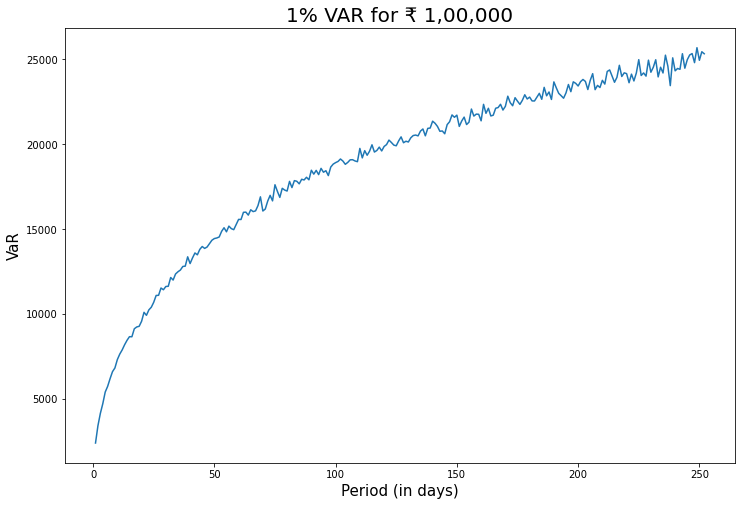

In [63]:
plt.figure(figsize=(12,8))
plt.plot(range(1, 252+1), var_p1)
plt.ylabel("VaR", fontsize= 15)
plt.xlabel("Period (in days)", fontsize = 15)
plt.title("1% VAR for ₹ 1,00,000", fontsize = 20)
plt.show()

### If you see as we increase VAR time period it is not actally linear relationship so it flattening out.It definitely make different between calculating 1 day or 5 days of VAR, but there is very little difference between 250 & 255 days VAR.

### Now we calculate & visualize the realtionship between VAR & Probability

We want prob. between 0.1% to 5% and total 100 probabilites between those values so we have 100 iterations & each and every iteration will calculate VAR and then we append each and every value of VAR to list var_p2.

In [64]:
var_p2 = []
for i in np.linspace(0.1, 5,100):
    var_p2.append(-var_param(df, days= 63, prob = i, I0 = 100000))

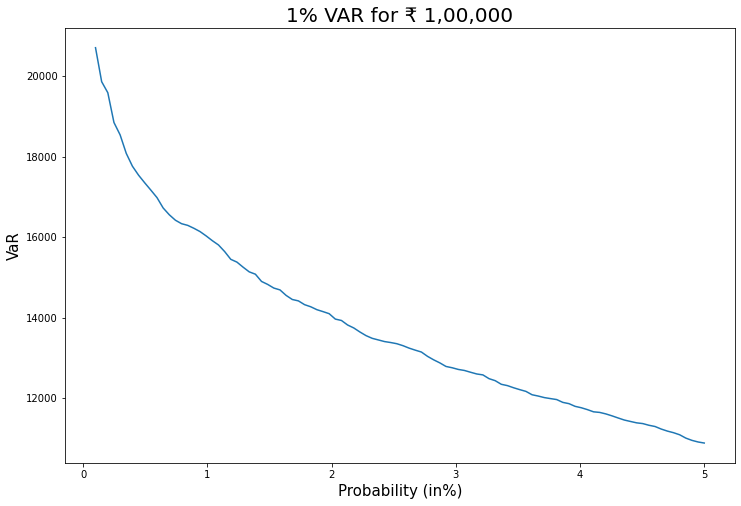

In [65]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0.1, 5, 100), var_p2)
plt.ylabel("VaR", fontsize= 15)
plt.xlabel("Probability (in%)", fontsize = 15)
plt.title("Quarterly VAR for ₹ 1,00,000", fontsize = 20)
plt.title("1% VAR for ₹ 1,00,000", fontsize = 20)
plt.show()

# 

## Monte Carlo Simulation - Bootstrapping Method (Part 1)

The investment fund ABC is currently have 1,00,000₹ position in Nifty. The Risk Manager of the fund wants to estimate the tail risk (extreme negative outcomes) of this podition based on historical data.

Simulate the minimum loss over a periodof one quarter that will occur with 1% probility: 1% VAR of 1,00,000₹ over a period of one quarter (63 business days). Use the parametric method.

In [66]:
I0 = 100
sims = 10000
days = 63

In [67]:
def path_simul_bootstr(df, days, I0, sims= 10000, seed= 123):
    
    days = int(days)
    
    np.random.seed(seed)
    ret = np.random.choice(df, size = days * sims, replace = True).reshape(sims, days)
    
    paths = ( ret + 1).cumprod(axis = 1) * I0
    paths = np.hstack((np.ones(sims).reshape(sims, 1)* I0, paths))
    
    return paths

In [68]:
paths = path_simul_bootstr(df, days = days, I0 = I0, sims = sims)
paths

array([[100.    , 100.6542, 100.5642, ...,  85.0043,  86.5778,  85.4113],
       [100.    , 100.7938,  98.0812, ..., 104.5762, 104.9772, 104.9916],
       [100.    , 100.5994, 101.7423, ..., 112.7934, 112.9851, 112.9333],
       ...,
       [100.    , 100.1262, 100.5078, ..., 101.8323, 101.2123, 100.9969],
       [100.    , 100.7568, 101.4996, ..., 104.0782, 104.5351, 105.8307],
       [100.    , 100.3251, 100.5891, ..., 110.7115, 109.2538, 109.8977]])

In [69]:
paths.shape

(10000, 64)

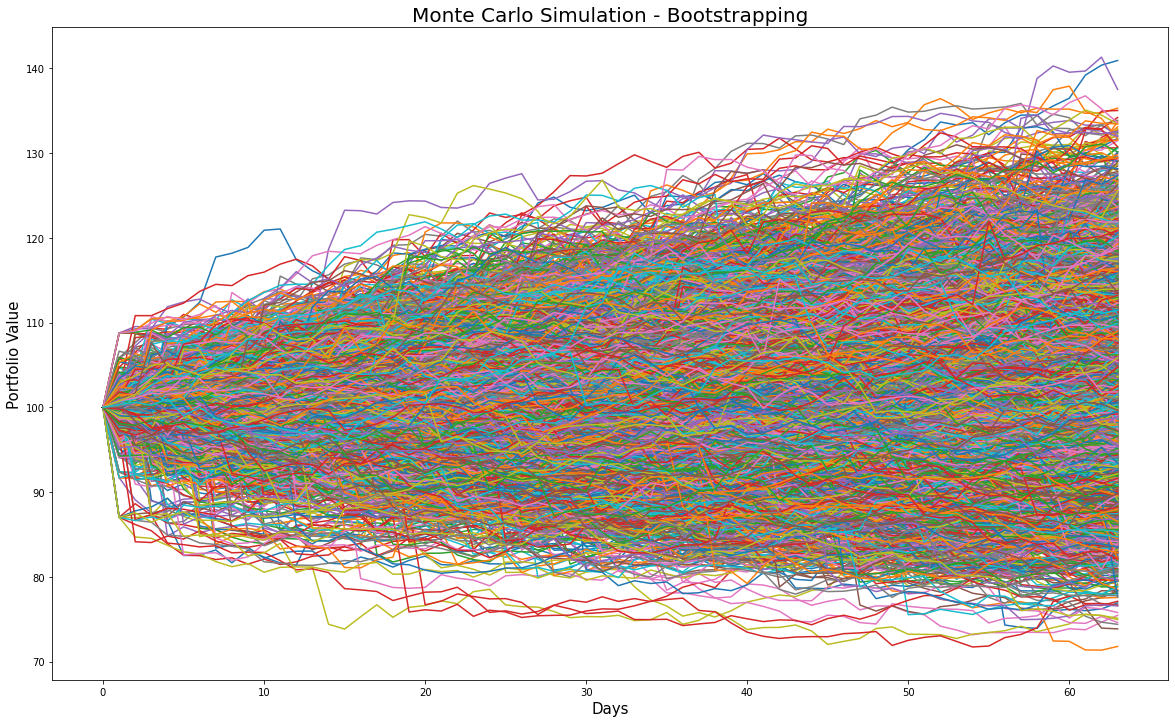

In [70]:
plt.figure(figsize=(20,12))
plt.plot(paths.T)
plt.ylabel("Portfolio Value", fontsize= 15)
plt.xlabel("Days", fontsize = 15)
plt.title("Monte Carlo Simulation - Bootstrapping", fontsize = 20)
plt.show()

In [71]:
I0 = 100000
sims = 100000
days = 63

In [72]:
paths = path_simul_bootstr(df, days = days, I0 = I0, sims = sims)

In [73]:
final_b = paths[:, -1]

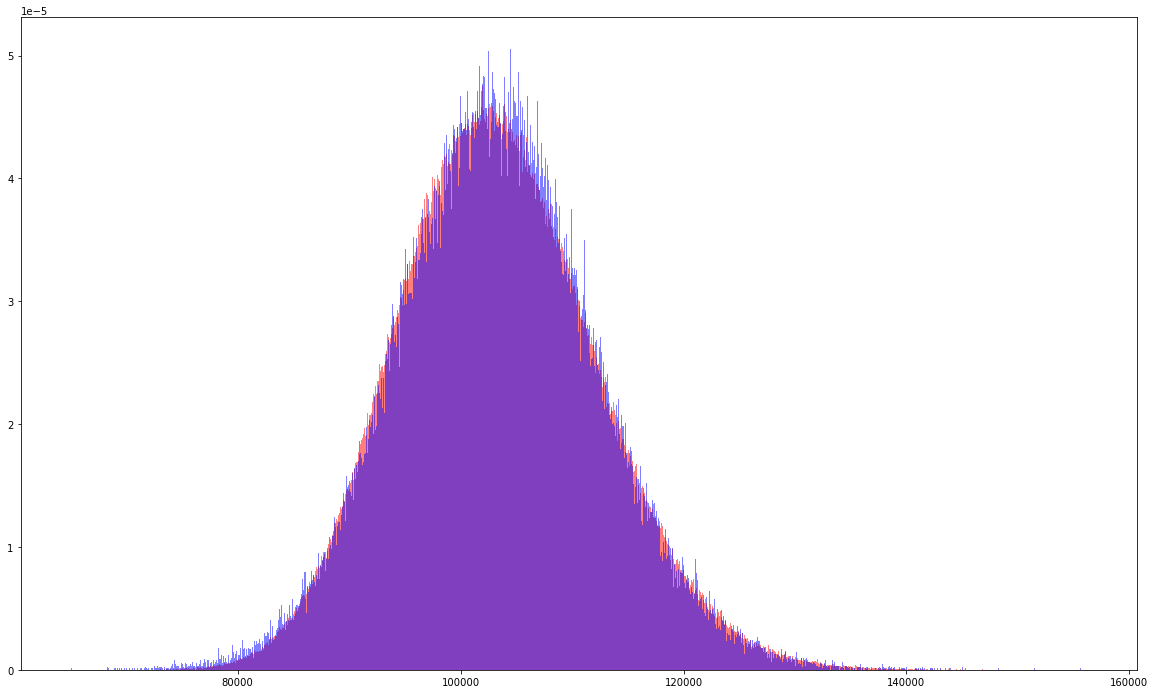

In [105]:
plt.figure(figsize=(20,12))
plt.hist(final_p, bins = 1000, density = True, alpha = 0.5, color = "r")
plt.hist(final_b, bins = 1000, density = True, alpha = 0.5, color = "b")
plt.show()

In [75]:
final_b.mean()

103311.95985059814

In [76]:
np.median(final_b)

103125.07412466977

In [77]:
final_b.std()

8933.467308104455

In [78]:
stats.skew(final_b)

0.1399524249196669

# 

### Calcualte 1% VaR of 1,00,000₹ over a one quarter period with bootstrapping method

In [79]:
I0 = 100000
prob = 0.01

In [80]:
final_b

array([ 85411.3101, 104991.5601, 112933.3303, ..., 102527.601 ,
        94220.7537, 106724.8898])

In [81]:
final_b.size

100000

 Now we have to find Quartely 1 % VAR with bootstrapping method

In [82]:
np.percentile(final_b, prob *100) - I0

-17041.870316225308

Now we have to find Quartely 1 % VAR with Parametric method

In [83]:
np.percentile(final_p, prob *100) - I0

-15736.18660023727

In [84]:
def var_bootstr(df, days,prob, I0, sims= 10000, seed= 123):
    
    days = int(days)
    
    np.random.seed(seed)
    ret = np.random.choice(df, size = days * sims, replace = True).reshape(sims, days)
    
    paths = ( ret + 1).cumprod(axis = 1) * I0
    var = np.percentile(paths, prob) - I0
    
    return var

In [85]:
var_bootstr(df, days = 63, prob = 1, I0 = 100000, sims= 1000000)

-13771.992206626543

In [86]:
var_b1 = []
for i in range(1, 252+1):
    var_b1.append(-var_bootstr(df, days= i, prob = 1, I0 = 100000))

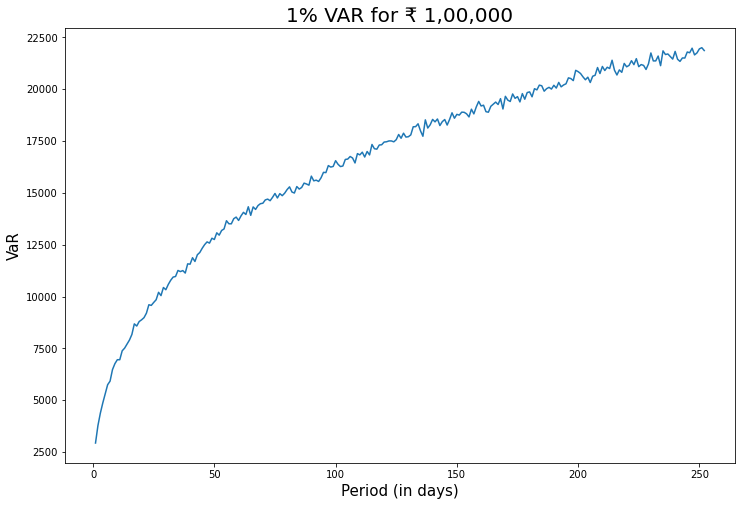

In [87]:
plt.figure(figsize=(12,8))
plt.plot(range(1, 252+1), var_b1)
plt.xlabel("Period (in days)", fontsize= 15)
plt.ylabel("VaR", fontsize = 15)
plt.title("1% VAR for ₹ 1,00,000", fontsize = 20)
plt.show()

In [88]:
var_b2 = []
for i in np.linspace(0.1, 5, 100):
    var_b2.append(-var_bootstr(df, days= 63, prob = i, I0 = 100000))

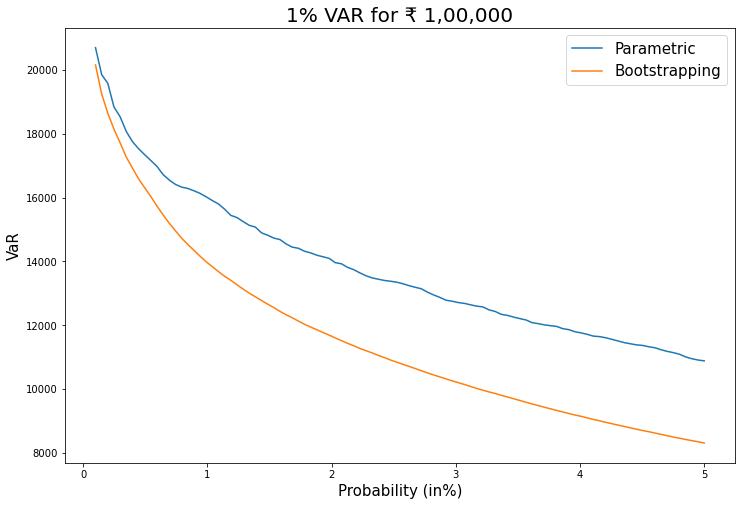

In [89]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0.1, 5, 100), var_p2, label = "Parametric")
plt.plot(np.linspace(0.1, 5, 100), var_b2, label = "Bootstrapping")
plt.ylabel("VaR", fontsize= 15)
plt.xlabel("Probability (in%)", fontsize = 15)
plt.title("Quarterly VAR for ₹ 1,00,000", fontsize = 20)
plt.title("1% VAR for ₹ 1,00,000", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

# 

# Conditional VAR/ Expected Shortfall 

The investment fund ABC is currently have 1,00,000₹ position in Nifty. The Risk Manager of the fund wants to estimate the tail risk (extreme negative outcomes) of this position based on historical data.

Simulate the conditional expected loss over a period of one quarter that will occur with 1% probility. Use and compare Parametric simulation & Bootstrapping simulation

In [90]:
prob = 0.01

In [91]:
final_p

array([109632.72  , 100023.6765, 103951.6245, ...,  98803.2325,
       102883.136 , 107799.6718])

Now find we will find 1st percentile

In [92]:
np.percentile(final_p, prob * 100)

84263.81339976273

In [93]:
np.percentile(final_p, prob * 100) - I0

-15736.18660023727

In [94]:
tail_p = final_p[final_p < np.percentile(final_p, prob * 100)]
tail_p

array([80253.7857, 82220.1009, 82585.7102, ..., 81609.8219, 83132.8894,
       79067.2817])

We have got the CVAR of Parametric method

In [96]:
tail_p.mean() - I0

-18119.411693427784

#### Now we are finding out CVAR for bootstrap method  

In [97]:
final_b

array([ 85411.3101, 104991.5601, 112933.3303, ..., 102527.601 ,
        94220.7537, 106724.8898])

In [98]:
np.percentile(final_b, prob * 100)

82958.12968377469

In [99]:
np.percentile(final_b, prob * 100) - I0

-17041.870316225308

In [101]:
tail_b = final_b[final_b < np.percentile(final_b, prob * 100)]
tail_b

array([76922.5586, 78034.2229, 75450.139 , 81714.3311, 78313.3549,
       81583.507 , 75783.9488, 81385.0564, 82685.1913, 82330.402 ,
       82828.9565, 80588.6818, 78088.5793, 81770.1992, 81331.5874,
       82442.5721, 80105.3387, 81883.7519, 78353.4316, 82948.5476,
       81900.9709, 82056.2343, 81918.239 , 80696.3609, 82016.0148,
       82938.8871, 81319.2248, 80761.8289, 81459.0778, 81083.8444,
       82842.1336, 82168.8603, 79880.9709, 82435.1993, 82262.9509,
       75109.2388, 80199.4745, 80787.3663, 71782.2427, 79512.6087,
       82649.2785, 80573.6815, 77560.1739, 78827.074 , 81408.7021,
       74393.8981, 82330.2184, 80955.9647, 78383.5164, 82023.6409,
       82726.0533, 82643.7457, 79138.6236, 74612.8824, 80444.0874,
       80746.0679, 77819.0128, 81921.6088, 79431.0255, 79618.54  ,
       82925.328 , 76722.222 , 80464.3812, 79450.7702, 82278.9076,
       76627.3321, 81779.212 , 82622.5121, 80265.5066, 81253.9975,
       80894.7781, 81568.3507, 73853.0634, 82009.054 , 79602.1

We have got the CVAR of bootstrap method

In [102]:
tail_b.mean() - I0

-20197.616620744942